# Evaluation

This Notebook contains the evaluation of all used machine learning models during this project. \
Evaluation and Validation will be performed on the test and validation data 

In [14]:
# Imports 
import numpy as np
import sys
sys.path.append("..")
import pandas as pd 
import matplotlib.pyplot as plt
from model.helpers import *
from model.predict import *
from collections import defaultdict
from sklearn.metrics import (
    roc_curve, auc)
import seaborn as sns

from plotly.offline import init_notebook_mode
import matplotlib.pyplot as plt
import warnings  
warnings.filterwarnings('ignore')

init_notebook_mode(connected=True)

In [15]:
#load data 
TRAIN = {}
TEST = {}
VALIDATION = {}

path = "../../data/interim/"
train = "train_"
test = "test_"
validation = "validation_"
#  list of scenarios
scenarios = [
        'CVE-2012-2122',
        'CVE-2014-0160',
        'CVE-2017-7529',
        'CVE-2017-12635_6',
        'CVE-2018-3760',
        'CVE-2019-5418',
        'CVE-2020-9484',
        'CVE-2020-13942',
        'CVE-2020-23839',
        'CWE-89-SQL-injection'
]

for i in range(0,len(scenarios)):
    TRAIN[scenarios[i]]= pd.read_pickle(path + "/" + train + scenarios[i] + ".pkl")
    TEST[scenarios[i]] = pd.read_pickle(path + "/" + test + scenarios[i] + ".pkl")
    VALIDATION[scenarios[i]] = pd.read_pickle(path + "/" + validation + scenarios[i] + ".pkl")
            

In [16]:
# load each model for each Scenario

model_type ='IsolationForest'
IsoForests = {}
for i in range(0, len(scenarios)):
# get dict and save mofel for each scenario
    IsoForests[scenarios[i]] = load_model(model_type=model_type, train_data=TRAIN, test_data=TEST, scenario=scenarios[i], contamination_rate=False)

model_type ='LocalOutlierFactor'
lof_ = {}
for i in range(0, len(scenarios)):
# get dict and save mofel for each scenario
    lof_[scenarios[i]] = load_model(model_type=model_type, train_data=TRAIN, test_data=TEST, scenario=scenarios[i], contamination_rate=False)

model_type = 'VariationalAutoencoder'
vae = {}
for i in range(0, len(scenarios)):
# get dict and save mofel for each scenario
    vae[scenarios[i]] = load_model(model_type=model_type, train_data=TRAIN, test_data=TEST, scenario=scenarios[i], contamination_rate=False)


298/298 [==============================] - 0s 464us/step


In [17]:
# get true values to evaluate algorithm
y_true = {}
for i in range(0, len(scenarios)):
    y_true[scenarios[i]] = encode(TEST[scenarios[i]])['exploit'] # remember 0 = inliners, 1 = outliers  

### ROC-AUC Curve

IsolationForest: Best Threshold 0.052089
LocalOutlierFactor: Best Threshold 1.547630
4040/4040 [==============================] - 2s 486us/step
VariationalAutoencoder: Best Threshold 2.708015


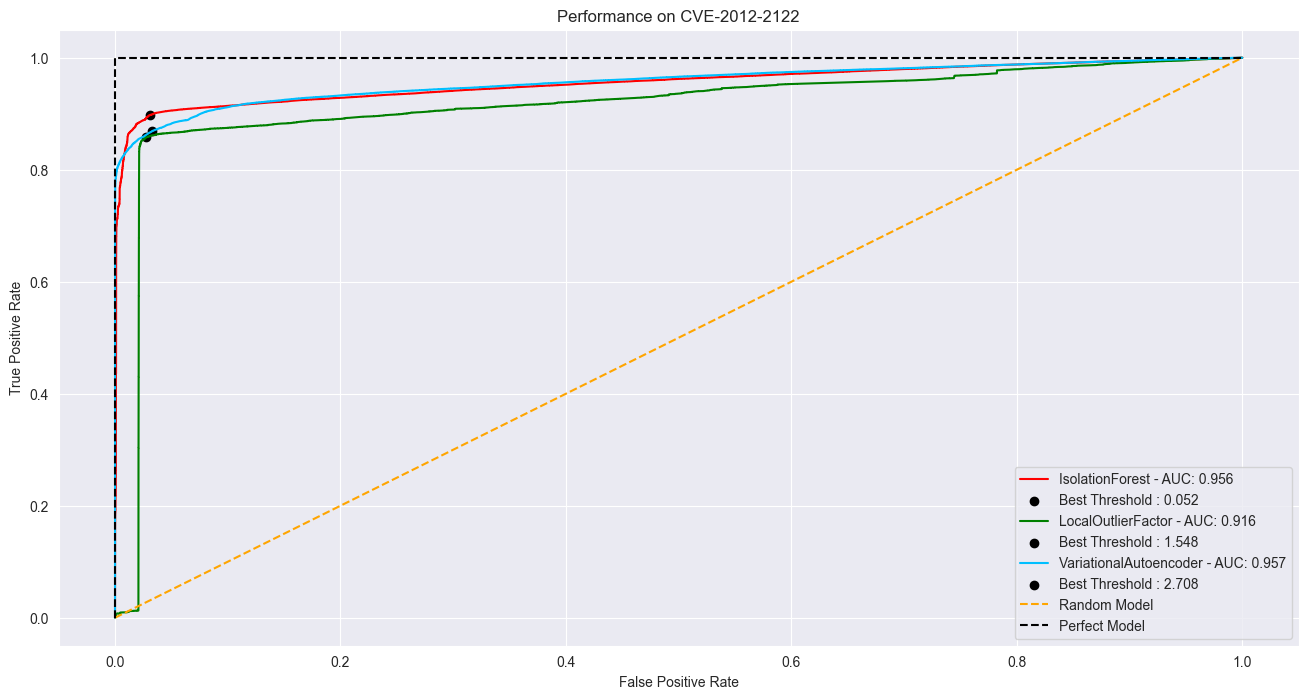

IsolationForest: Best Threshold -0.064240
LocalOutlierFactor: Best Threshold 1.255012
1156/1156 [==============================] - 1s 460us/step
VariationalAutoencoder: Best Threshold 1.623565


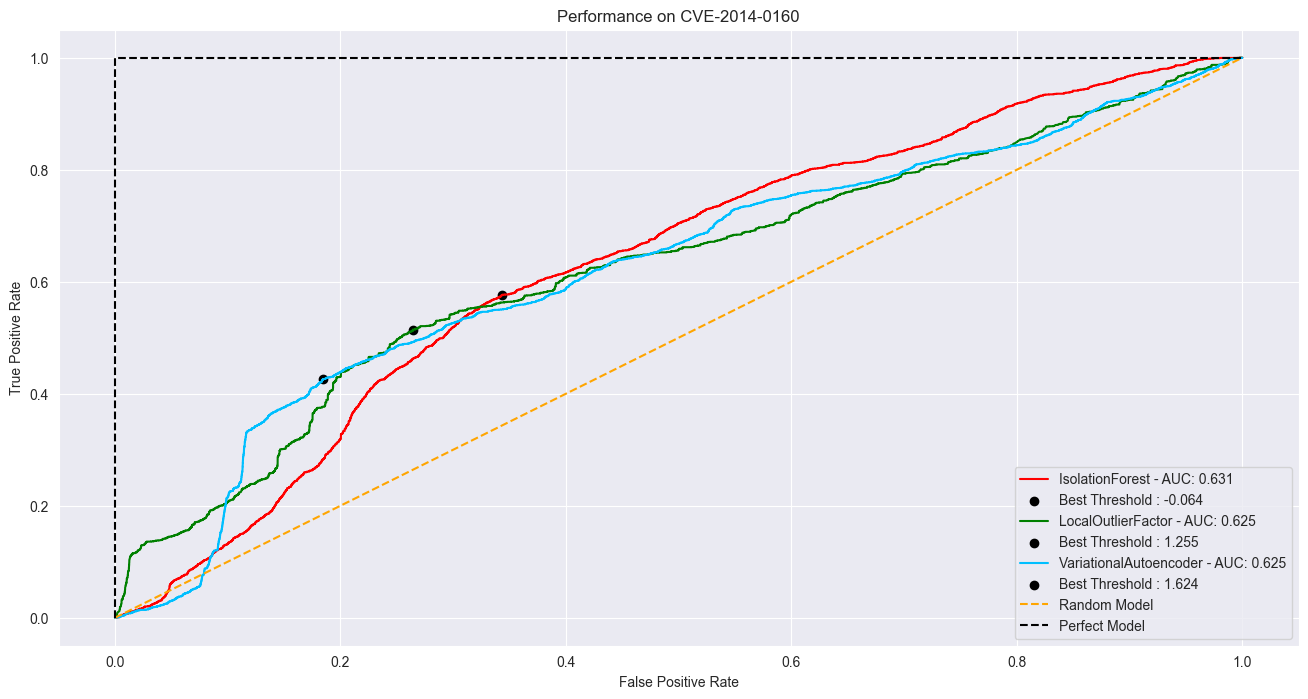

IsolationForest: Best Threshold -0.219009
LocalOutlierFactor: Best Threshold 1.000000
1101/1101 [==============================] - 0s 438us/step
VariationalAutoencoder: Best Threshold 0.517512


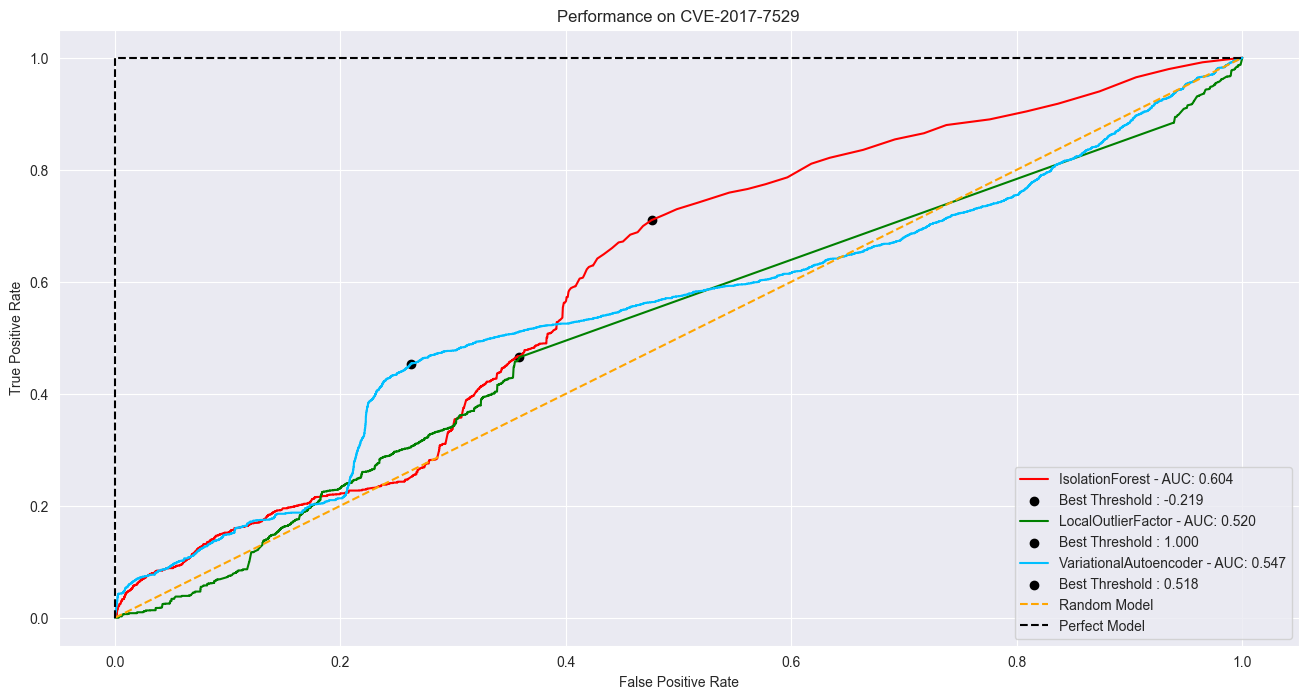

IsolationForest: Best Threshold -0.056342
LocalOutlierFactor: Best Threshold 1.000000
1169/1169 [==============================] - 1s 442us/step
VariationalAutoencoder: Best Threshold 1.372460


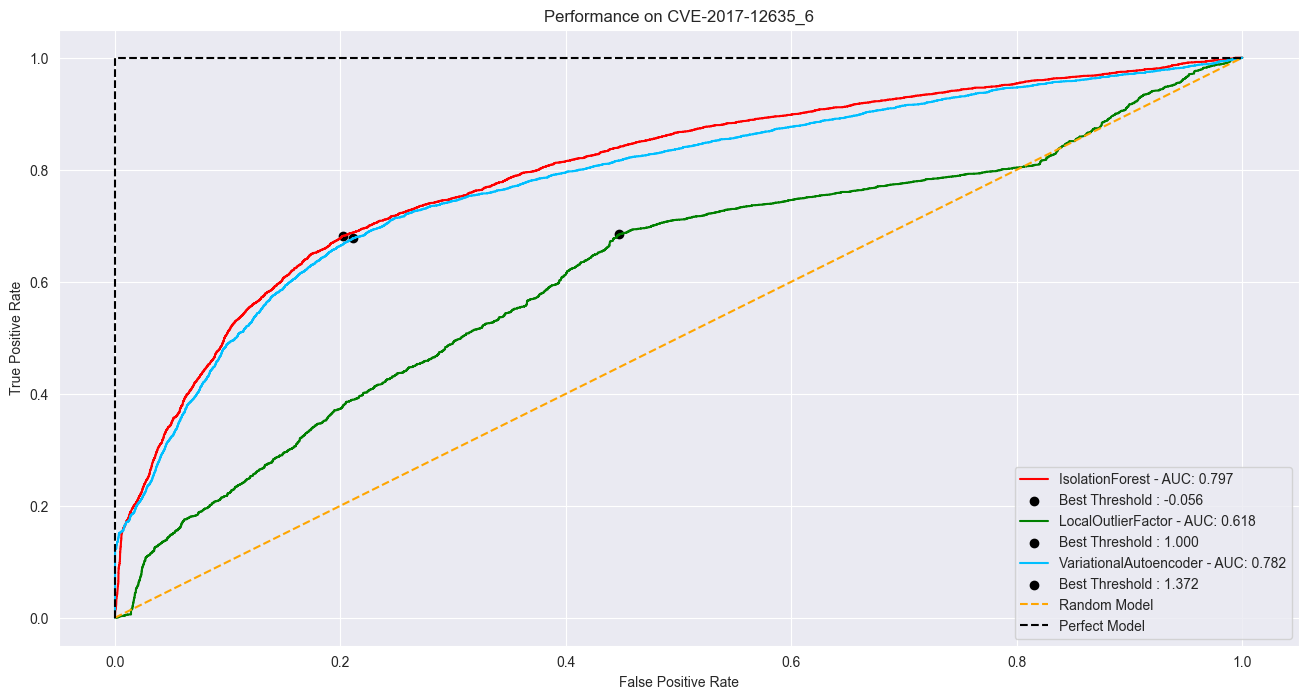

IsolationForest: Best Threshold -0.128030
LocalOutlierFactor: Best Threshold 16123.480194
1117/1117 [==============================] - 0s 436us/step
VariationalAutoencoder: Best Threshold 2.354552


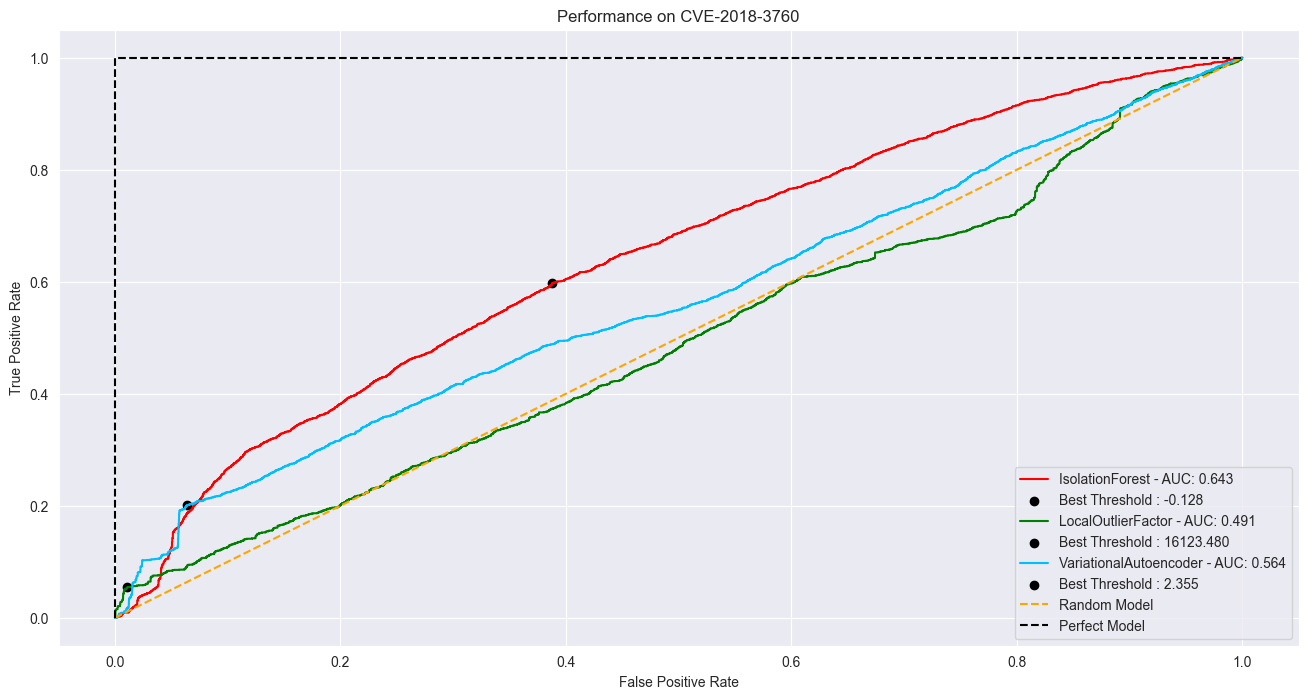

IsolationForest: Best Threshold -0.181735
LocalOutlierFactor: Best Threshold 353.330152
1165/1165 [==============================] - 1s 456us/step
VariationalAutoencoder: Best Threshold 2.458625


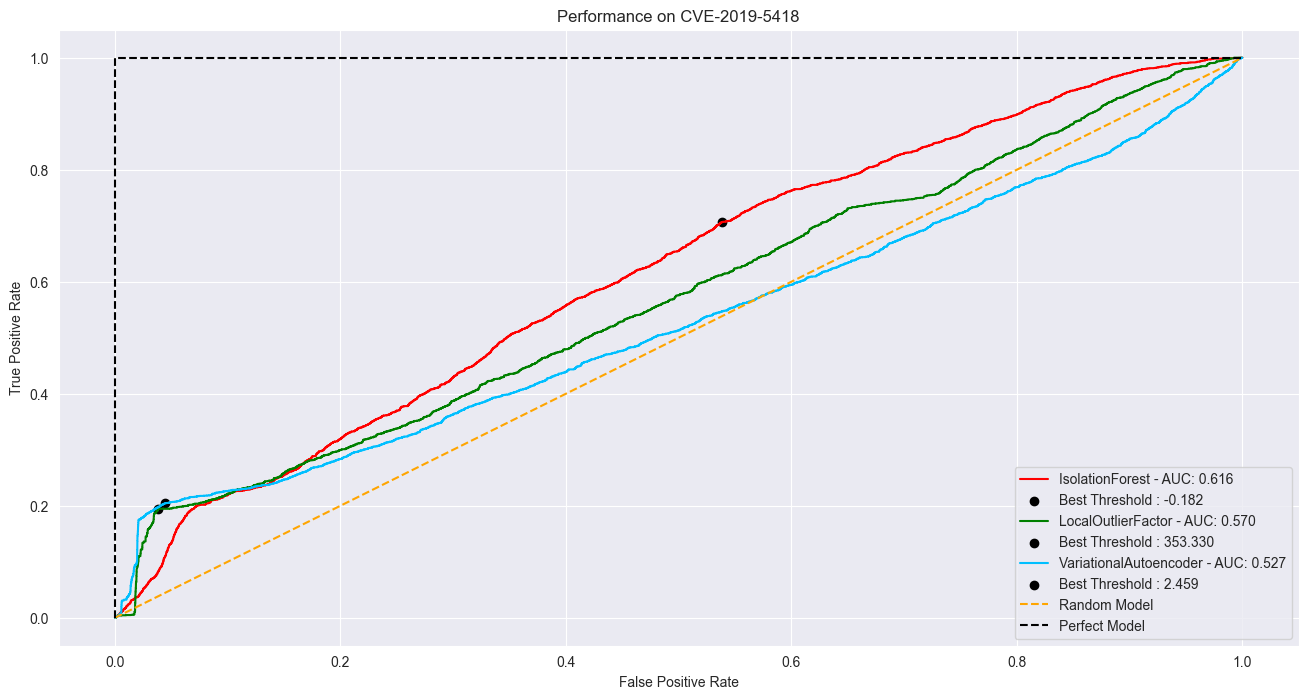

IsolationForest: Best Threshold -0.197891
LocalOutlierFactor: Best Threshold 0.986250
1183/1183 [==============================] - 1s 439us/step
VariationalAutoencoder: Best Threshold 0.990009


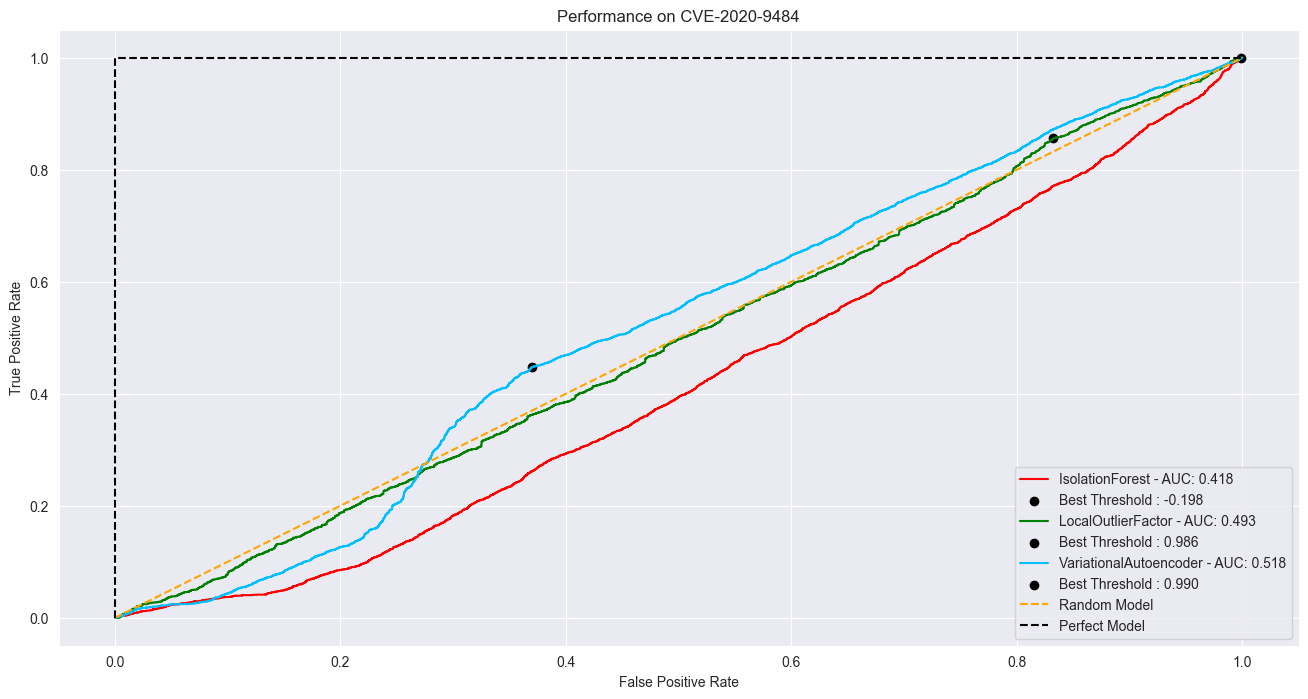

IsolationForest: Best Threshold -0.152166
LocalOutlierFactor: Best Threshold 0.993694
1150/1150 [==============================] - 1s 454us/step
VariationalAutoencoder: Best Threshold 0.848498


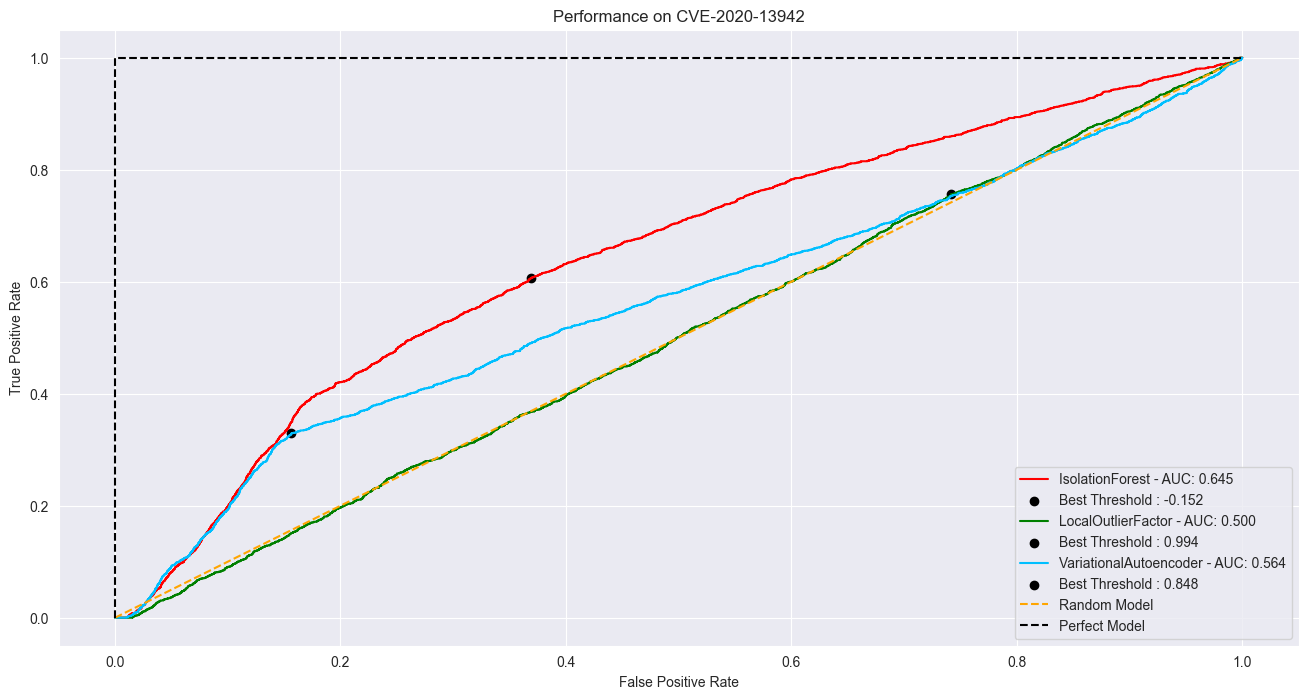

IsolationForest: Best Threshold -0.056440
LocalOutlierFactor: Best Threshold 1.136132
1248/1248 [==============================] - 1s 468us/step
VariationalAutoencoder: Best Threshold 1.413871


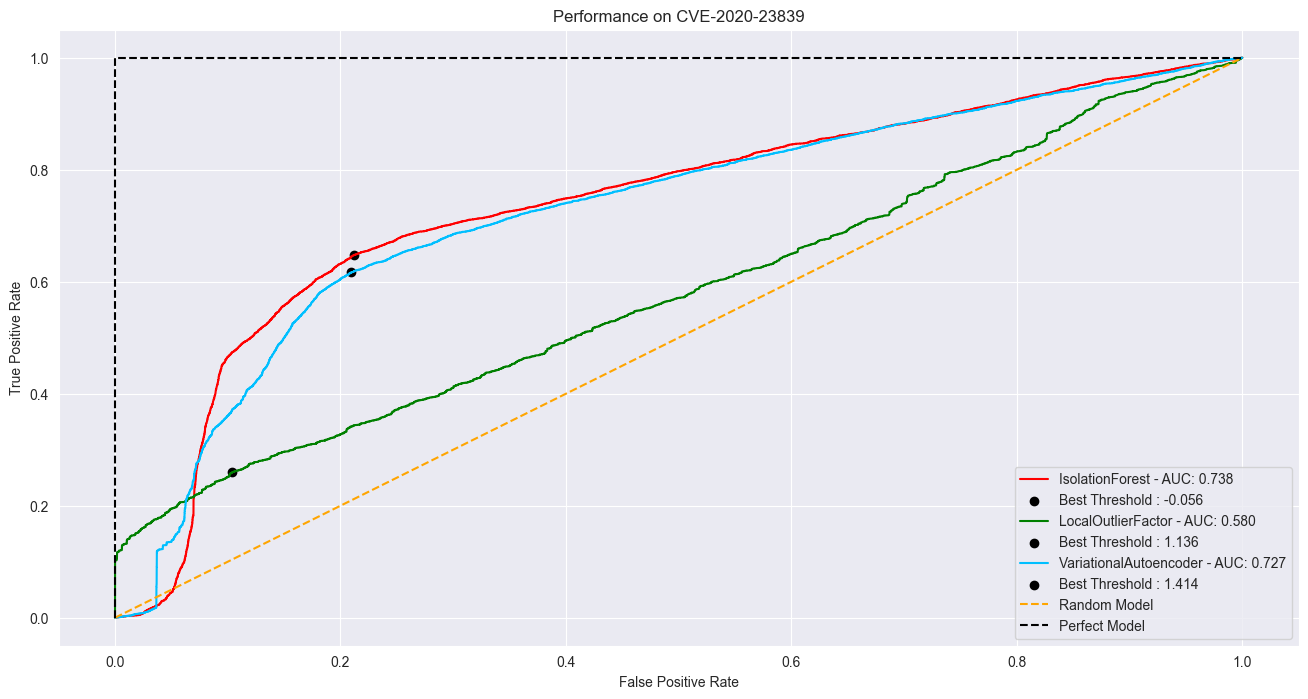

IsolationForest: Best Threshold -0.093453
LocalOutlierFactor: Best Threshold 1.180198
1207/1207 [==============================] - 1s 465us/step
VariationalAutoencoder: Best Threshold 1.417289


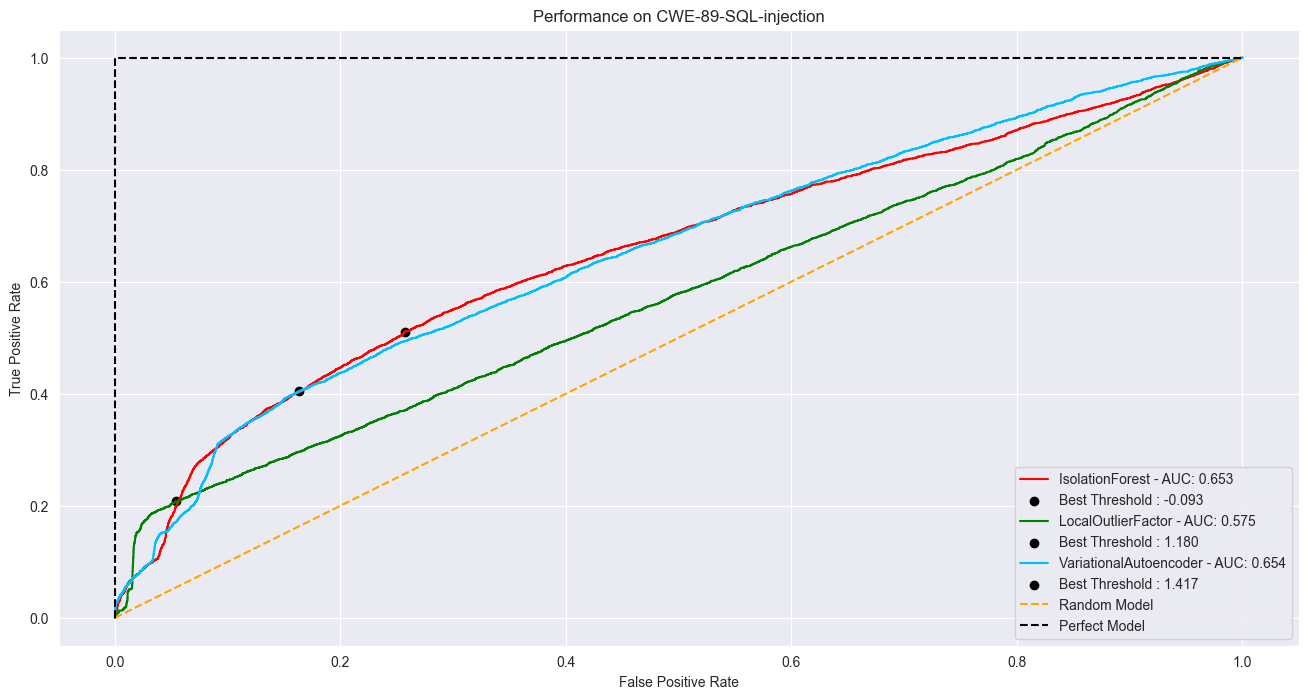

In [20]:
sns.set_style('darkgrid')
name = ['IsolationForest',  'LocalOutlierFactor', 'VariationalAutoencoder']
colors = ['red', 'green', 'deepskyblue']
# Create plots for all scenarios 
for i in range(0,len(scenarios)):
   # prepare test data 
   X_test = TEST[scenarios[i]]
   X_test = select_columns_for_modelling(X_test)

   algorithms = [ IsoForests[scenarios[i]], lof_[scenarios[i]], vae[scenarios[i]] ] 
  

   fig = plt.figure(figsize=(16,8))
   for a, algo in enumerate(algorithms):
      algo_test = algo.decision_function(X_test)
   
      fpr_test_, tpr_test_, thresholds = roc_curve(y_true[scenarios[i]], algo_test)  
      algo_auc_test = auc(fpr_test_, tpr_test_)
      J = tpr_test_ - fpr_test_
      ix = np.argmax(J)
      best_thresh = thresholds[ix]
      #print(str(name[a]) + ': Best Threshold %f' % (best_thresh))


      
      plt.subplot(1, 1, 1)
      plt.title('Performance on ' + scenarios[i])
      plt.plot(fpr_test_, tpr_test_, color=colors[a], label= '{0} - AUC: {1:.3f}'.format(name[a], algo_auc_test)) 
      plt.scatter(fpr_test_[ix], tpr_test_[ix], marker='o', color='black', label='Best Threshold : {1:.3f}'.format(name[a], best_thresh)) # Ausssage nochmal nach prüfen!
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive Rate')
      


   plt.subplot(1, 1, 1)
   plt.plot([0, 1], [0, 1], linestyle='--', label='Random Model', color="orange")
   plt.plot([0,0,1], [0, 1, 1], linestyle='--', label='Perfect Model', color="black")
   plt.legend(loc=0)
   plt.xlim((-0.05, 1.05))
   plt.ylim((-0.05, 1.05))

   plt.show()
   fig.savefig("../../src/plots/models/EVALUATION_ALLMODELS_" + scenarios[i] + ".png")

### Evaluation after Outlier Truncation

Outliers will be truncated using the Interquartile Range (IQR)

In [6]:
no_outliers = {}
for i in range(0,len(scenarios)):
    normal = TEST[scenarios[i]][TEST[scenarios[i]]['exploit']==False]
    attack = TEST[scenarios[i]][TEST[scenarios[i]]['exploit']!=False]
    # chose only cpu_usage and memory_usage
    normal = select_columns_outlier_truncate(normal)
    attack = select_columns_outlier_truncate(attack)
    # calculate IQR for each scenario
    Q1 = normal.quantile(0.25)
    Q3 = normal.quantile(0.75)
    IQR = Q3 - Q1
    normal = normal[~((normal< (Q1 - 1.5 * IQR)) |(normal > (Q3 + 1.5 * IQR))).any(axis=1)]
    no_outliers[scenarios[i]] = pd.concat([normal, attack])


In [7]:
# get all scenarios in one data set at the end
no_outliers_test = []
for key in no_outliers.keys():
    no_outliers[key]['scenario'] = key
    temp_df = no_outliers[key]
    no_outliers_test.append(temp_df)
no_outliers['ALL'] = pd.concat(no_outliers_test)

In [8]:
# get true values to evaluate algorithm
y_true = {}
for i in range(0, len(scenarios)):
    y_true[scenarios[i]] = encode(no_outliers[scenarios[i]])['exploit'] # remember 0 = inliners, 1 = outliers


### ROC-AUC Curve

IsolationForest: Best Threshold 0.142805
LocalOutlierFactor: Best Threshold 1.547630
3983/3983 [==============================] - 2s 453us/step
VariationalAutoencoder: Best Threshold 2.460679


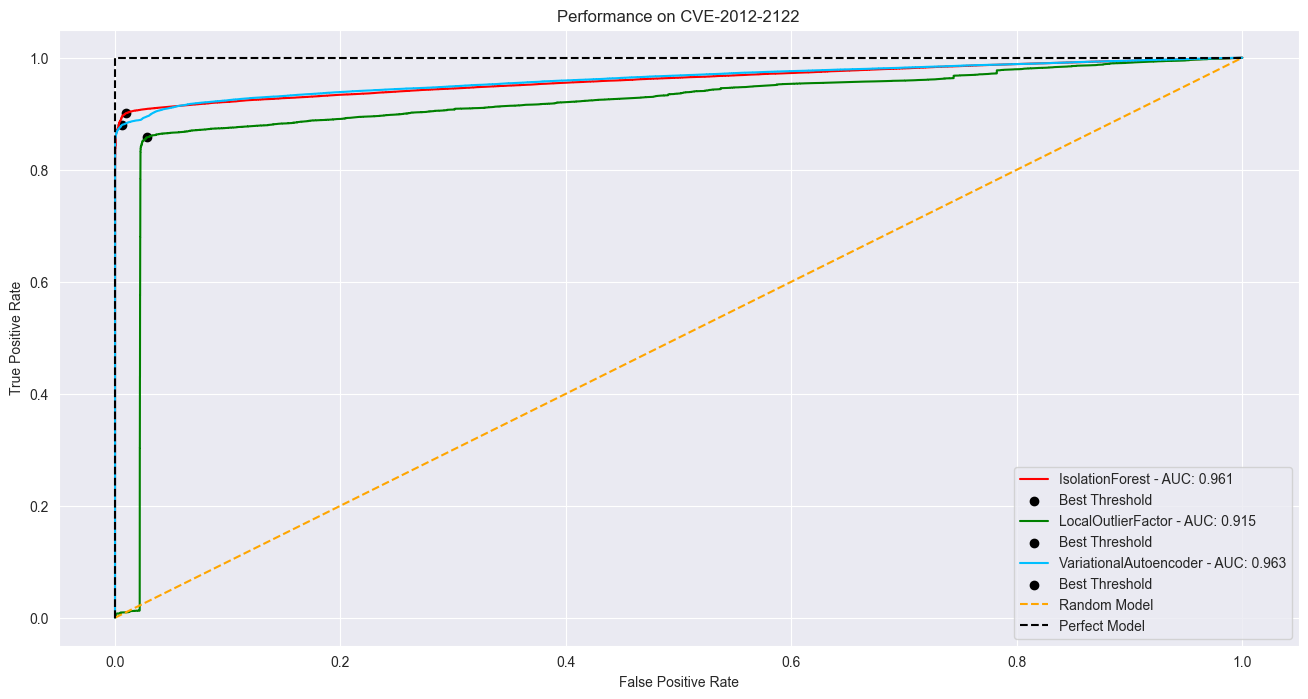

IsolationForest: Best Threshold -0.082130
LocalOutlierFactor: Best Threshold 1.255012
1070/1070 [==============================] - 0s 448us/step
VariationalAutoencoder: Best Threshold 1.623773


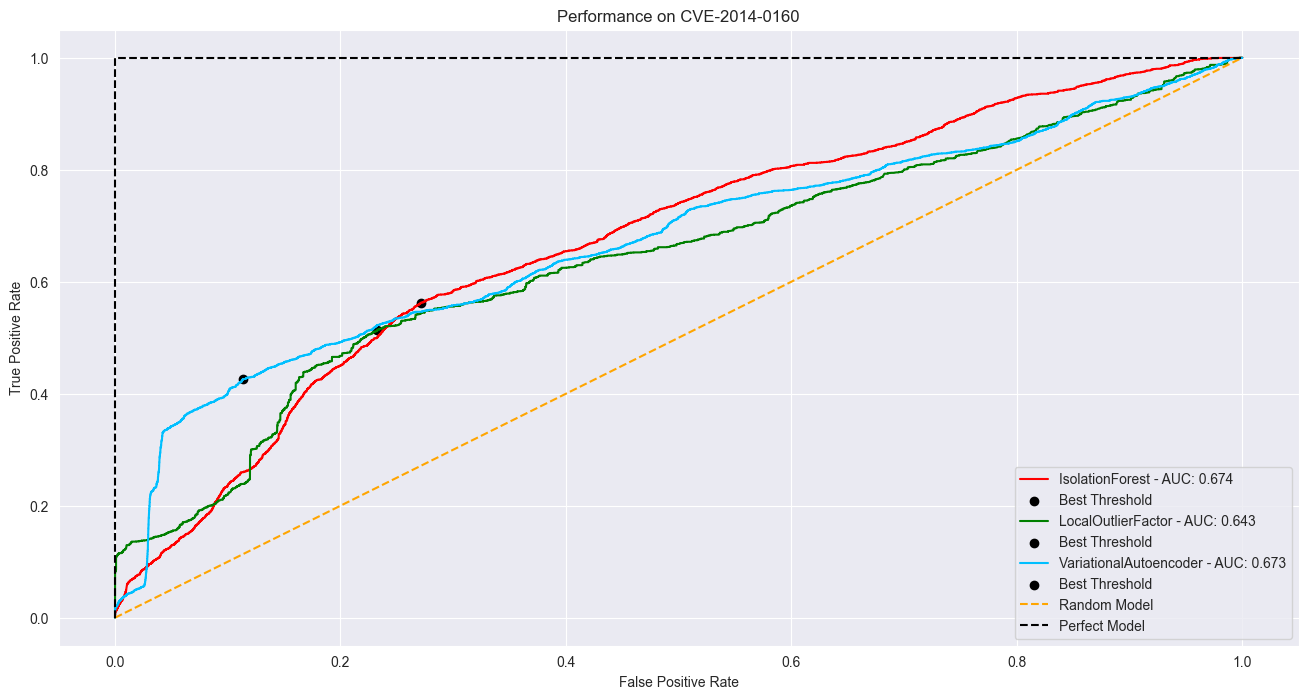

IsolationForest: Best Threshold -0.224852
LocalOutlierFactor: Best Threshold 1.000000
700/700 [==============================] - 0s 427us/step
VariationalAutoencoder: Best Threshold 0.535233


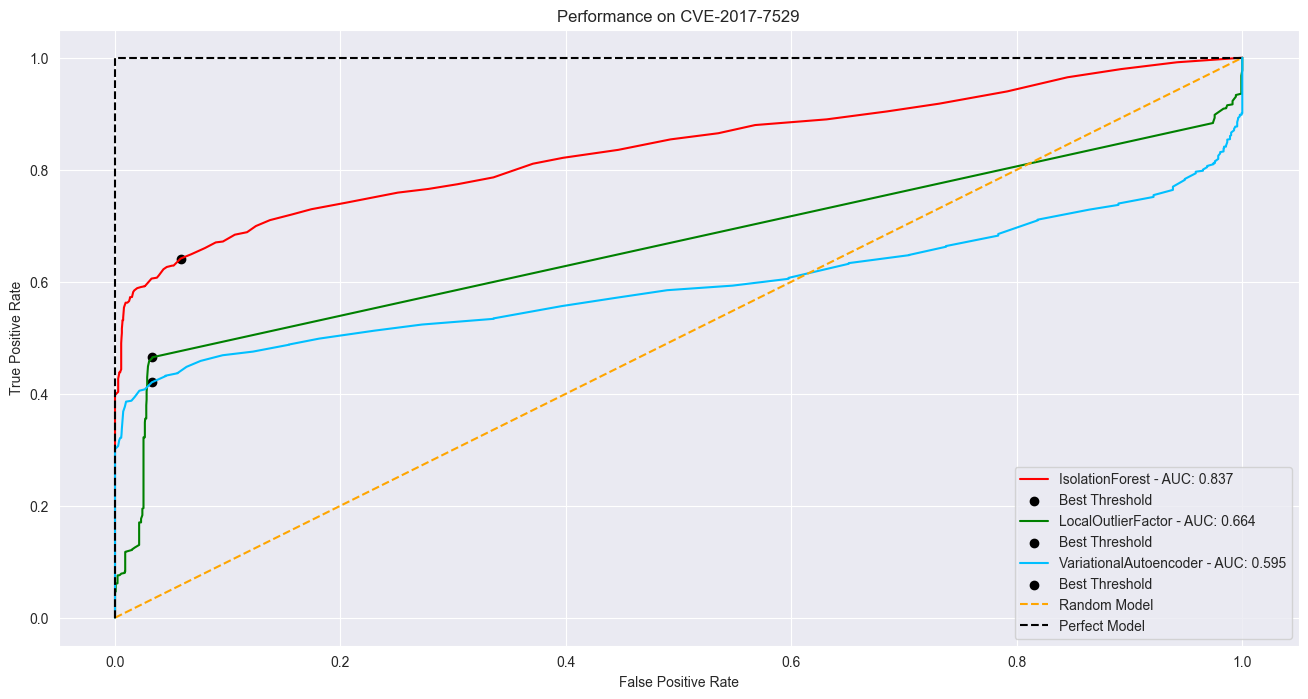

IsolationForest: Best Threshold -0.056107
LocalOutlierFactor: Best Threshold 1.000000
1083/1083 [==============================] - 0s 425us/step
VariationalAutoencoder: Best Threshold 1.391638


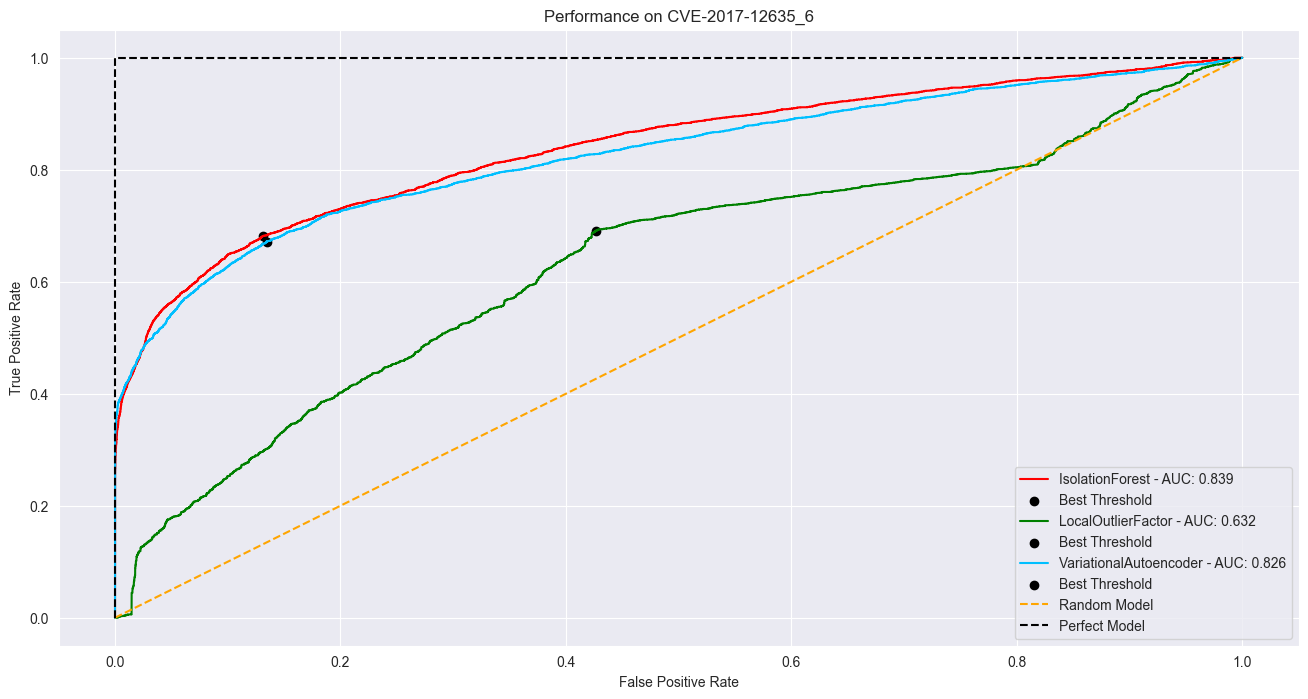

KeyError: 'CVE-2018-3760'

In [12]:
sns.set_style('darkgrid')
name = ['IsolationForest',  'LocalOutlierFactor', 'VariationalAutoencoder']
colors = ['red', 'green', 'deepskyblue']
# Create plots for all scenarios 
for i in range(0,len(scenarios)):
   # prepare test data 
   X_test = no_outliers[scenarios[i]]
   X_test = select_columns_for_modelling(X_test)

   algorithms = [ IsoForests[scenarios[i]], lof_[scenarios[i]], vae[scenarios[i]]] 
  
   fig = plt.figure(figsize=(16,8))
   for a, algo in enumerate(algorithms):
      algo_test = algo.decision_function(X_test)
   
      fpr_test_, tpr_test_, thresholds = roc_curve(y_true[scenarios[i]], algo_test)
      algo_auc_test = auc(fpr_test_, tpr_test_)
      J = tpr_test_ - fpr_test_
      ix = np.argmax(J)
      best_thresh = thresholds[ix]
      #print(str(name[a]) + ': Best Threshold %f' % (best_thresh))


      plt.subplot(1, 1, 1)
      plt.title('Performance on ' + scenarios[i])
      plt.plot(fpr_test_, tpr_test_, color=colors[a], label= '{0} - AUC: {1:.3f}'.format(name[a], algo_auc_test))
      plt.scatter(fpr_test_[ix], tpr_test_[ix], marker='o', color='black', label='Best Threshold: {1:.3f}'.format(name[a], best_thresh))
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive Rate')
      


   plt.subplot(1, 1, 1)
   plt.plot([0, 1], [0, 1], linestyle='--', label='Random Model', color="orange")
   plt.plot([0,0,1], [0, 1, 1], linestyle='--', label='Perfect Model', color="black")
   plt.legend(loc=0)
   plt.xlim((-0.05, 1.05))
   plt.ylim((-0.05, 1.05))

   plt.show()
   fig.savefig("../../src/plots/models/EVALUATION_ALLMODELS_NO_OUTLIERS" + scenarios[i] + ".png")

## Evaluation after adjusting contamination rate dynamically 

In [13]:
# load each model for each Scenario

model_type ='IsolationForest'
IsoForests = {}
for i in range(0, len(scenarios)):
# get dict and save mofel for each scenario
    IsoForests[scenarios[i]] = load_model(model_type=model_type, train_data=TRAIN, test_data=TEST, scenario=scenarios[i], contamination_rate=True)

model_type ='LocalOutlierFactor'
lof_ = {}
for i in range(0, len(scenarios)):
# get dict and save mofel for each scenario
    lof_[scenarios[i]] = load_model(model_type=model_type, train_data=TRAIN, test_data=TEST, scenario=scenarios[i], contamination_rate=True)

model_type = 'VariationalAutoencoder'
vae = {}
for i in range(0, len(scenarios)):
# get dict and save mofel for each scenario
    vae[scenarios[i]] = load_model(model_type=model_type, train_data=TRAIN, test_data=TEST, scenario=scenarios[i], contamination_rate=True)


CVE-2012-2122:0.5
CVE-2014-0160:0.07508720930232558
CVE-2017-7529:0.07513427734375
CVE-2017-12635_6:0.1007916188458256
CVE-2018-3760:0.07467131983513343
CVE-2019-5418:0.07250172691687773
CVE-2020-9484:0.09392249226945641
CVE-2020-13942:0.0708319995343829
CVE-2020-23839:0.1532595823344213
CWE-89-SQL-injection:0.1235052806144715
CVE-2012-2122:0.5
CVE-2014-0160:0.07508720930232558
CVE-2017-7529:0.07513427734375
CVE-2017-12635_6:0.1007916188458256
CVE-2018-3760:0.07467131983513343
CVE-2019-5418:0.07250172691687773
CVE-2020-9484:0.09392249226945641
CVE-2020-13942:0.0708319995343829
CVE-2020-23839:0.1532595823344213
CWE-89-SQL-injection:0.1235052806144715
CVE-2012-2122:0.5
301/301 [==============================] - 0s 470us/step
CVE-2014-0160:0.07508720930232558
299/299 [==============================] - 0s 441us/step
CVE-2017-7529:0.07513427734375
296/296 [==============================] - 0s 463us/step
CVE-2017-12635_6:0.1007916188458256
294/294 [==============================] - 0s 445us/

KeyboardInterrupt: 

3983/3983 [==============================] - 2s 457us/step


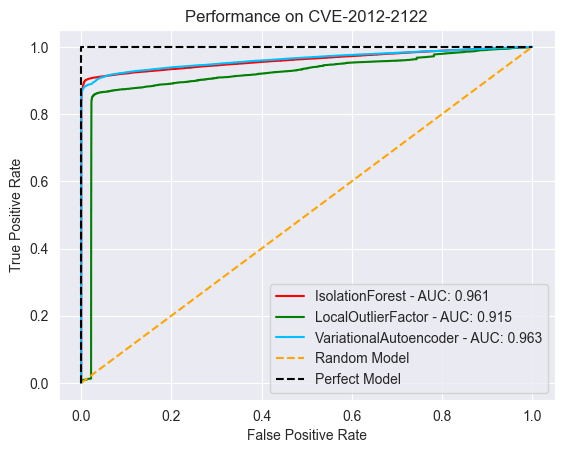

1070/1070 [==============================] - 0s 457us/step


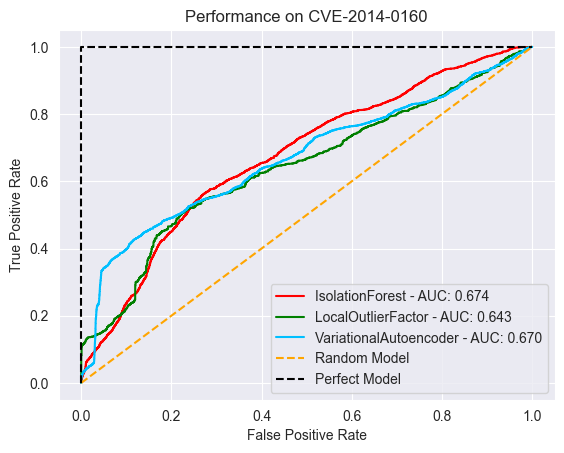

700/700 [==============================] - 0s 427us/step


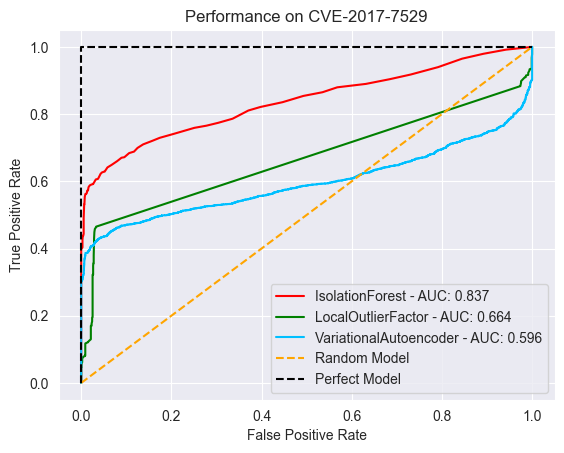

1083/1083 [==============================] - 0s 432us/step


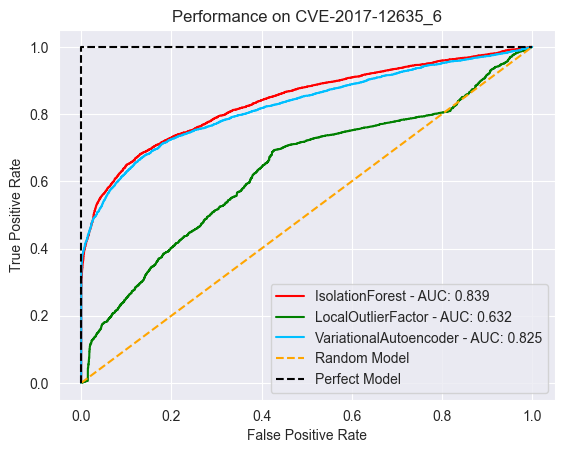

935/935 [==============================] - 0s 435us/step


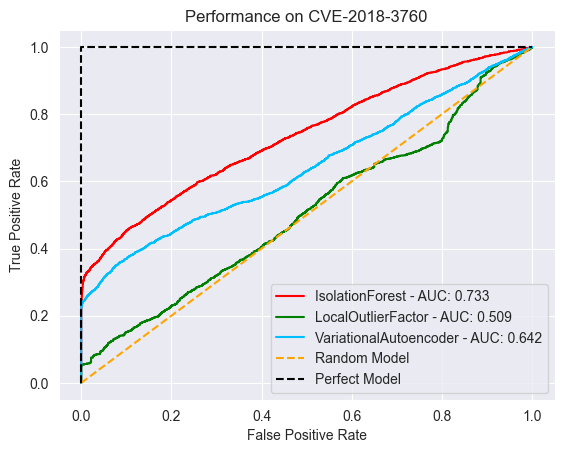

1063/1063 [==============================] - 1s 462us/step


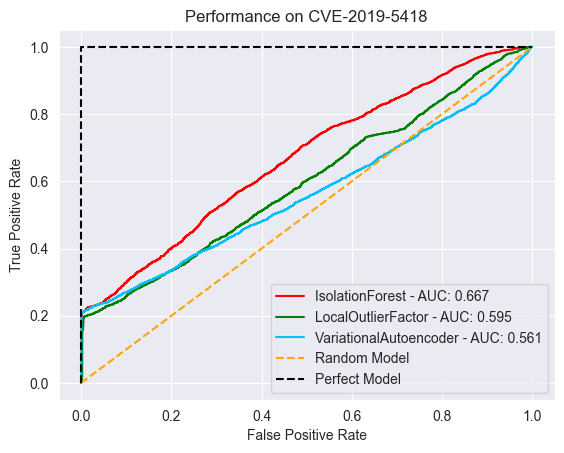

972/972 [==============================] - 0s 424us/step


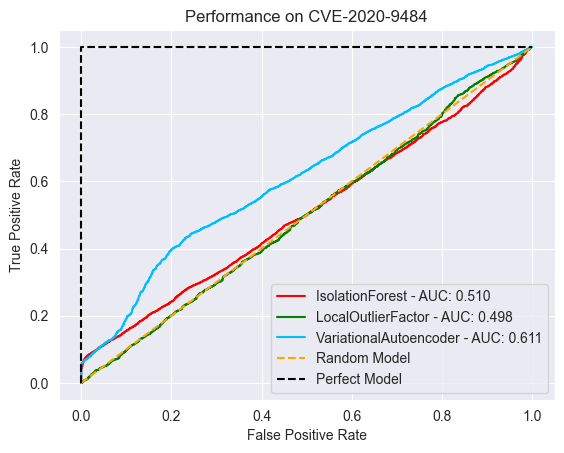

983/983 [==============================] - 0s 456us/step


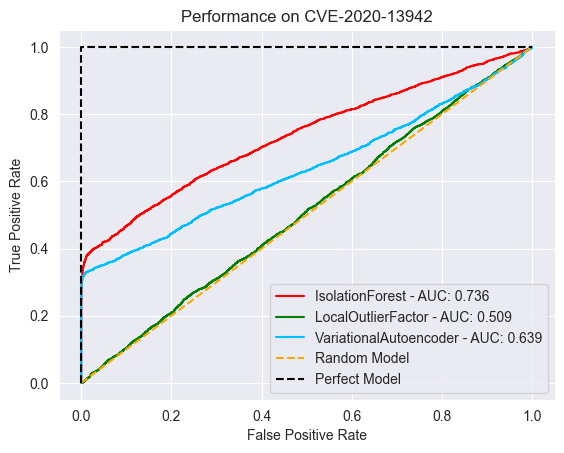

1116/1116 [==============================] - 1s 456us/step


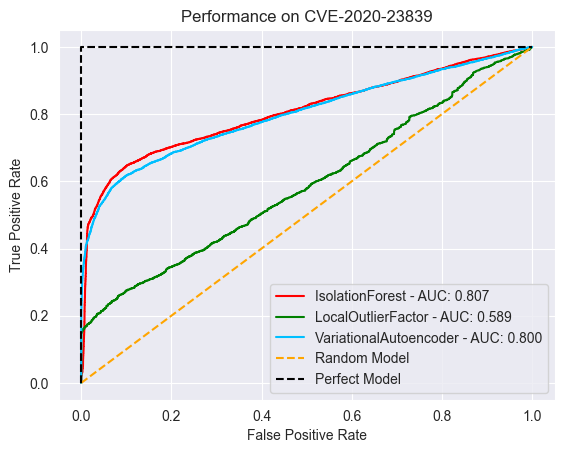

1141/1141 [==============================] - 1s 474us/step


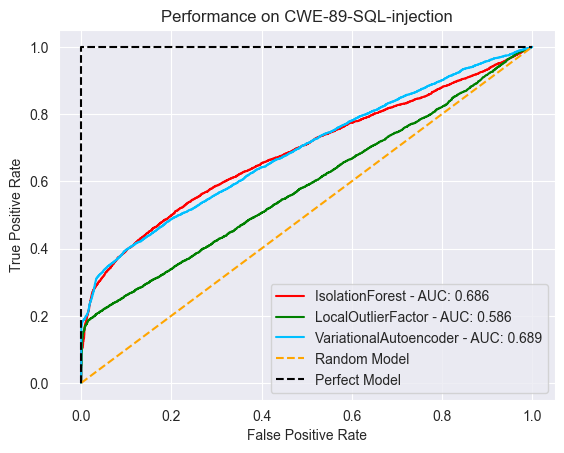

In [ ]:
sns.set_style('darkgrid')
name = ['IsolationForest',  'LocalOutlierFactor', 'VariationalAutoencoder']
colors = ['red', 'green', 'deepskyblue']
# Create plots for all scenarios 
for i in range(0,len(scenarios)):
   # prepare test data 
   X_test = no_outliers[scenarios[i]]
   X_test = select_columns_for_modelling(X_test)

   algorithms = [ IsoForests[scenarios[i]], lof_[scenarios[i]], vae[scenarios[i]]] 
  
   fig = plt.figure()
   for a, algo in enumerate(algorithms):
      algo_test = algo.decision_function(X_test)
   
      fpr_test_, tpr_test_, thresholds = roc_curve(y_true[scenarios[i]], algo_test)
      algo_auc_test = auc(fpr_test_, tpr_test_)
      J = tpr_test_ - fpr_test_
      ix = np.argmax(J)
      best_thresh = thresholds[ix]
      print(str(name[a]) + ': Best Threshold %f' % (best_thresh))

      plt.subplot(1, 1, 1)
      plt.title('Performance on ' + scenarios[i])
      plt.plot(fpr_test_, tpr_test_, color=colors[a], label= '{0} - AUC: {1:.3f}'.format(name[a], algo_auc_test))
      plt.scatter(fpr_test_[ix], tpr_test_[ix], marker='o', color='black', label='Best Threshold')
      
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive Rate')
      
   plt.subplot(1, 1, 1)
   plt.plot([0, 1], [0, 1], linestyle='--', label='Random Model', color="orange")
   plt.plot([0,0,1], [0, 1, 1], linestyle='--', label='Perfect Model', color="black")
   plt.legend(loc=0)
   plt.xlim((-0.05, 1.05))
   plt.ylim((-0.05, 1.05))

   plt.show()
   fig.savefig("../../src/plots/models/EVALUATION_ALLMODELS_Contaminataion_rate" + scenarios[i] + ".png")